In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [7]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [11]:
# Check the % missing values in all the columns of the train set
train.isnull().sum()*100/train.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [14]:
test.isnull().sum()*100/test.shape[0]

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [25]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [112]:
train_subset = train[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare']]
test_subset = test[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare']]

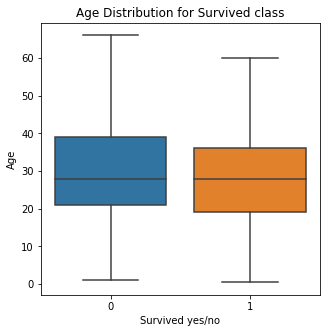

In [113]:
plt.figure(figsize = (5,5))
# sns.set_palette(sns.color_palette(color_code))
sns.boxplot(x=train_subset.Survived, y =train_subset.Age, data = train_subset, showfliers = False)
plt.title('Age Distribution for Survived class')
plt.xlabel("Survived yes/no")
plt.ylabel("Age")
plt.show()

In [114]:
train_subset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
dtype: object

In [115]:
train_subset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare'],
      dtype='object')

In [116]:
# Data cleaning for train set

median = train_subset["Age"].median()
train_subset["Age"].fillna(median, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [117]:
train_subset['Sex'] = train_subset['Sex'].map(lambda s: True if s == "male" else False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [118]:
cols = ['Pclass', 'Sex', 'SibSp','Survived']

for col in cols:
    print(train_subset[col].unique())

[3 1 2]
[ True False]
[1 0 3 4 2 5 8]
[0 1]


In [119]:
cols_new = ['Pclass', 'Sex', 'SibSp']

for col in cols_new:
    train_subset[col] = pd.factorize(train_subset[col])[0] + 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [120]:
from sklearn.model_selection import train_test_split

X = train_subset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
                  'Fare']]
y = train_subset[['Survived']]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(596, 6) (596, 1)
(295, 6) (295, 1)


In [135]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
709,1,1,28.0,1,1,15.2458
439,3,1,31.0,2,0,10.5000
840,1,1,20.0,2,0,7.9250
720,3,2,6.0,2,1,33.0000
39,1,2,14.0,1,0,11.2417


In [124]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logistic_model = logreg.fit(X_train, y_train)

logistic_model

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [125]:
predictions = logistic_model.predict(X_test)
predictions[0:10]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [126]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       175
           1       0.80      0.68      0.74       120

    accuracy                           0.80       295
   macro avg       0.80      0.78      0.79       295
weighted avg       0.80      0.80      0.80       295



In [146]:
median = test_subset["Age"].median()
test_subset["Age"].fillna(median, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [147]:
test_subset['Sex'] = test_subset['Sex'].map(lambda s: True if s == "male" else False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
cols_new = ['Pclass', 'Sex', 'SibSp']

for col in cols_new:
    test_subset[col] = pd.factorize(test_subset[col])[0] + 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [149]:
test_subset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,892,1,1,34.5,1,0,330911,7.8292
1,893,1,1,47.0,2,0,363272,7.0000
2,894,2,1,62.0,1,0,240276,9.6875
3,895,1,1,27.0,1,0,315154,8.6625
4,896,1,1,22.0,2,1,3101298,12.2875


In [150]:
test_subset_submission = test_subset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare']]
test_ids = test_subset['PassengerId']
test_subset_submission.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,1,34.5,1,0,7.8292
1,1,1,47.0,2,0,7.0000
2,2,1,62.0,1,0,9.6875
3,1,1,27.0,1,0,8.6625
4,1,1,22.0,2,1,12.2875


In [151]:
test_subset_submission.isnull().sum()*100/test_subset_submission.shape[0]

Pclass    0.000000
Sex       0.000000
Age       0.000000
SibSp     0.000000
Parch     0.000000
Fare      0.239234
dtype: float64

In [152]:
median_fare = test_subset["Fare"].median()
test_subset_submission["Fare"].fillna(median_fare, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [153]:
test_predictions = logistic_model.predict(test_subset_submission)

In [154]:
output = pd.DataFrame({ 'PassengerId' : test_ids, 'Survived': test_predictions })
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [155]:
output.to_csv('submission.csv', index=False)